# Checkpoint 2.4: Model Building using ML Algorithms 

### Capstone Project Batch: B Group: 3 

* Capstone Project Domain: Automotive Industry
* Batch B
* Group 3
* Members: Tanisha Jain , Priya Bhardwaj, Aman Bhardwaj and Satyam Sharma

Tasks: Model Building:
1.	Build an appropriate ML model/s on the data.
2.	Compare various ML models with appropriate regularization and/or hyper-parameter tuning.
3.	Evaluate the performance of the model.
4.	Identify the right metric to evaluate the performance of the model.
5.	Identify issues and concerns on the given data and suggest the best technique/s to overcome the issues.

**Importing all libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('ProcessedCarData.csv')
performanceMetrics=pd.DataFrame(columns=['Algorithm','R2 Score','MSE','Parameters'])

In [3]:
df.shape

(7905, 19)

In [4]:
df.columns

Index(['Unnamed: 0', 'Sales_ID', 'name', 'year', 'selling_price', 'km_driven',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'region', 'brand',
       'sold_Y'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Sales_ID,name,year,selling_price,km_driven,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,brand,sold_Y
0,0,1,Maruti Swift Dzire VDI,7,450000,145500,1,Washington,1,1,1,1,23.40,1248,74.00,5,1,Maruti,1
1,1,2,Skoda Rapid 1.5 TDI Ambition,7,370000,120000,2,New York City,1,1,1,2,21.14,1498,103.52,5,1,Skoda,1
2,2,3,Honda City 2017-2020 EXi,15,158000,140000,3,Chicago,2,1,1,3,17.70,1497,78.00,5,2,Honda,1
3,3,4,Hyundai i20 Sportz Diesel,11,225000,127000,3,Chicago,1,1,1,1,23.00,1396,90.00,5,2,Hyundai,1
4,4,5,Maruti Swift VXI BSIII,14,130000,120000,2,New York City,2,1,1,1,16.10,1298,88.20,5,1,Maruti,1


In [6]:
df.corr()

,Unnamed: 0,Sales_ID,year,selling_price,km_driven,State or Province,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,sold_Y
Unnamed: 0,1.000000,0.999998,0.001153,-0.011963,0.009799,0.227497,-0.031623,-0.021866,-0.017377,0.001051,0.030641,-0.011145,-0.003568,-0.014071,0.078365,-0.752972
Sales_ID,0.999998,1.000000,0.001144,-0.012015,0.009811,0.227828,-0.031604,-0.021923,-0.017421,0.001022,0.030691,-0.011173,-0.003609,-0.014066,0.078410,-0.753896
year,0.001153,0.001144,1.000000,-0.412272,0.428724,-0.009710,0.032528,-0.231768,-0.248976,0.499779,-0.331552,-0.018213,-0.226559,0.007966,-0.015238,-0.002815
selling_price,-0.011963,-0.012015,-0.412272,1.000000,-0.222267,0.001849,-0.201181,0.321370,0.590259,-0.216449,-0.130040,0.455662,0.749665,0.041588,0.031877,0.018958
km_driven,0.009799,0.009811,0.428724,-0.222267,1.000000,0.008521,-0.246465,-0.192874,-0.201267,0.281992,-0.178484,0.205973,-0.038243,0.227217,0.000674,-0.005021
State or Province,0.227497,0.227828,-0.009710,0.001849,0.008521,1.000000,-0.007288,-0.025496,-0.030826,-0.016811,0.009439,-0.005225,-0.012180,-0.001053,0.065904,-0.266525
fuel,-0.031623,-0.031604,0.032528,-0.201181,-0.246465,-0.007288,1.000000,0.036344,0.011047,-0.016301,-0.022593,-0.488228,-0.306341,-0.339059,-0.002807,0.011218
seller_type,-0.021866,-0.021923,-0.231768,0.321370,-0.192874,-0.025496,0.036344,1.000000,0.357727,-0.197541,-0.022948,0.119992,0.239213,-0.075309,0.056454,0.031986
transmission,-0.017377,-0.017421,-0.248976,0.590259,-0.201267,-0.030826,0.011047,0.357727,1.000000,-0.141290,-0.178407,0.283188,0.541859,-0.072745,0.022328,0.019467
owner,0.001051,0.001022,0.499779,-0.216449,0.281992,-0.016811,-0.016301,-0.197541,-0.141290,1.000000,-0.176261,0.007876,-0.104716,0.027610,-0.010023,0.005381


In [7]:
data=df.drop(['Sales_ID','name','Unnamed: 0','City','brand','selling_price'],axis=1)

* Dropped the above columns because:
    1. selling price is target variable
    2. Sales ID is unique for all
    3. name, city and brand are string attributes.

In [8]:
data.columns

Index(['year', 'km_driven', 'State or Province', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'region', 'sold_Y'],
      dtype='object')

In [9]:
data.corr()

,year,km_driven,State or Province,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,sold_Y
year,1.000000,0.428724,-0.009710,0.032528,-0.231768,-0.248976,0.499779,-0.331552,-0.018213,-0.226559,0.007966,-0.015238,-0.002815
km_driven,0.428724,1.000000,0.008521,-0.246465,-0.192874,-0.201267,0.281992,-0.178484,0.205973,-0.038243,0.227217,0.000674,-0.005021
State or Province,-0.009710,0.008521,1.000000,-0.007288,-0.025496,-0.030826,-0.016811,0.009439,-0.005225,-0.012180,-0.001053,0.065904,-0.266525
fuel,0.032528,-0.246465,-0.007288,1.000000,0.036344,0.011047,-0.016301,-0.022593,-0.488228,-0.306341,-0.339059,-0.002807,0.011218
seller_type,-0.231768,-0.192874,-0.025496,0.036344,1.000000,0.357727,-0.197541,-0.022948,0.119992,0.239213,-0.075309,0.056454,0.031986
transmission,-0.248976,-0.201267,-0.030826,0.011047,0.357727,1.000000,-0.141290,-0.178407,0.283188,0.541859,-0.072745,0.022328,0.019467
owner,0.499779,0.281992,-0.016811,-0.016301,-0.197541,-0.141290,1.000000,-0.176261,0.007876,-0.104716,0.027610,-0.010023,0.005381
mileage,-0.331552,-0.178484,0.009439,-0.022593,-0.022948,-0.178407,-0.176261,1.000000,-0.589928,-0.385629,-0.470651,-0.004377,-0.030033
engine,-0.018213,0.205973,-0.005225,-0.488228,0.119992,0.283188,0.007876,-0.589928,1.000000,0.703964,0.611093,0.011522,0.013222
max_power,-0.226559,-0.038243,-0.012180,-0.306341,0.239213,0.541859,-0.104716,-0.385629,0.703964,1.000000,0.191976,0.026824,0.010300


* Not removing any columns because no column is highly correlated with each other

In [10]:
data.head()

,year,km_driven,State or Province,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,region,sold_Y
0,7,145500,1,1,1,1,1,23.40,1248,74.00,5,1,1
1,7,120000,2,1,1,1,2,21.14,1498,103.52,5,1,1
2,15,140000,3,2,1,1,3,17.70,1497,78.00,5,2,1
3,11,127000,3,1,1,1,1,23.00,1396,90.00,5,2,1
4,14,120000,2,2,1,1,1,16.10,1298,88.20,5,1,1


In [11]:
df['owner'].value_counts()

1    5215
2    2016
3     510
4     159
5       5
Name: owner, dtype: int64

In [12]:
df.isnull().sum()

Unnamed: 0           0
Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
seats                0
region               0
brand                0
sold_Y               0
dtype: int64

In [13]:
def scale(Xdata_train, Xdata_test):
    scaler = MinMaxScaler()
    Xdata_train=scaler.fit_transform(Xdata_train)
    Xdata_test=scaler.transform(Xdata_test)
    return Xdata_train, Xdata_test


### 1.	Build an appropriate ML model/s on the data.
### 2.	Compare various ML models with appropriate regularization and/or hyper-parameter tuning.
### 3.	Evaluate the performance of the model.



* **Models built:**
    1. Linear Regression
        * without PCA
        * with PCA
        * lasso regularization
        * ridge regularization
    2. KNN
    3. Decision Tree
    4. Random Forest
    5. Boosting Algorithms
        * Adaboost
        * Gradient Boost
        * XGBoost

# Linear Regression (without PCA)

In [14]:
LinearRegResults =pd.DataFrame()
randomState=[42, 66, 80]
for rs in randomState:
    for t in np.arange(0.6,0.81,0.05):
        Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df['selling_price'], train_size=t, random_state=rs)
        Xdata_train, Xdata_test= scale(Xdata_train, Xdata_test)
        
        model = linear_model.LinearRegression()   
        model.fit(Xdata_train, Ydata_train)     
        data_predicted = model.predict(Xdata_test) 
        
        MSE = mean_squared_error(Ydata_test, data_predicted)
        R2_Score = r2_score(Ydata_test, data_predicted)  
        LinearRegResults =LinearRegResults.append({'Algorithm':'Linear Regression','TrainSize':t, 'Random State': rs,
                                       'R2_Score': R2_Score, 'MSE': MSE, },ignore_index=True)


In [15]:
LinearRegResults.sort_values('R2_Score', ascending = False)[:5]

,Algorithm,MSE,R2_Score,Random State,TrainSize
14,Linear Regression,2.282399e+11,0.695888,80.0,0.80
11,Linear Regression,2.099481e+11,0.685713,80.0,0.65
12,Linear Regression,2.088586e+11,0.684892,80.0,0.70
13,Linear Regression,2.188999e+11,0.684117,80.0,0.75
10,Linear Regression,2.161831e+11,0.679629,80.0,0.60


In [16]:
Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df['selling_price'], train_size=0.8, random_state=80)
Xdata_train, Xdata_test= scale(Xdata_train, Xdata_test)


model = linear_model.LinearRegression()
model.fit(Xdata_train, Ydata_train)     
data_predicted = model.predict(Xdata_test)

MSE = mean_squared_error(Ydata_test, data_predicted)
R2_Score = r2_score(Ydata_test, data_predicted)
print('Test data performance metrics:')
print("\nMSE : ", MSE , "\nR2_Score :", R2_Score)
       
    
data_predicted1 = model.predict(Xdata_train)
MSE1 = mean_squared_error(Ydata_train, data_predicted1)
R2_Score1 = r2_score(Ydata_train, data_predicted1)

print('Train data performance metrics:')
print("\nMSE : ", MSE1 , "\nR2_Score :", R2_Score1)

Test data performance metrics:

MSE :  228239921223.35864 
R2_Score : 0.6958877120815488
Train data performance metrics:

MSE :  215363425250.78384 
R2_Score : 0.6630517515150587


* The Linear Regression model works on this dataset with a training R2 Score of 0.66 and testing R2 score of 0.69.
* The dataset is scaled here.

In [17]:
performanceMetrics = performanceMetrics.append({'Algorithm':'Linear Regression(without PCA)','R2 Score':R2_Score,'MSE':MSE},ignore_index=True)

# Linear Regression (with PCA)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca


PCA(n_components=3)

In [19]:
principalComponents = pca.fit_transform(data)
print(len(principalComponents))


7905


In [20]:
principalComponents.shape


(7905, 3)

In [21]:
print(principalComponents[:])


[[ 7.63020755e+04  3.50563469e+02  2.97104344e+00]
 [ 5.08025744e+04  5.28355043e+01  1.61242819e+01]
 [ 7.08025400e+04  9.16530429e+01 -7.13350530e+00]
 ...
 [ 5.08021183e+04  3.04043825e+02 -4.29327051e-01]
 [-4.41974525e+04 -1.68040187e+01 -2.35343078e+01]
 [-4.41974525e+04 -1.68013150e+01 -2.36383815e+01]]


In [22]:
pca.explained_variance_ratio_


array([9.99924152e-01, 7.55997679e-05, 1.85679850e-07])

Text(0, 0.5, 'Data_explained')

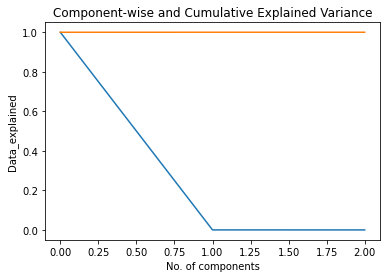

In [23]:
plt.plot(range(3), pca.explained_variance_ratio_ , label='Variance-ratio')
plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_) , label='cumulative variance-ratio')
plt.title('Component-wise and Cumulative Explained Variance')
plt.xlabel('No. of components')
plt.ylabel('Data_explained')


In [24]:
pcaResults =pd.DataFrame()
randomState=[42, 66, 80]
for rs in randomState:
    for t in np.arange(0.6,0.81,0.05):
        Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(principalComponents[:], df['selling_price'], train_size=t, random_state=rs)
        model = linear_model.LinearRegression()  #creating a dummy model 
        model.fit(Xdata_train, Ydata_train)     #apply fit function (model has to be applied on the data)
        data_predicted = model.predict(Xdata_test) #predict function contain values of target for Xdata_test
        MSE = mean_squared_error(Ydata_test, data_predicted)
        R2_Score = r2_score(Ydata_test, data_predicted) #if data_predicted = Ydata_test is 1 , then it's correct 
        pcaResults =pcaResults.append({'Algorithm':'Linear Regression','TrainSize':t, 'Random State': rs,
                                       'R2_Score': R2_Score, 'MSE': MSE, },ignore_index=True)


In [25]:
pcaResults.sort_values('R2_Score', ascending = False)[:5]

,Algorithm,MSE,R2_Score,Random State,TrainSize
14,Linear Regression,2.745591e+11,0.634171,80.0,0.80
11,Linear Regression,2.552853e+11,0.617845,80.0,0.65
12,Linear Regression,2.534235e+11,0.617657,80.0,0.70
13,Linear Regression,2.660586e+11,0.616065,80.0,0.75
10,Linear Regression,2.626368e+11,0.610788,80.0,0.60


In [26]:
Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(principalComponents, df['selling_price'], train_size=0.8, random_state=80)

model = linear_model.LinearRegression()
model.fit(Xdata_train, Ydata_train)     
data_predicted = model.predict(Xdata_test)

MSE = mean_squared_error(Ydata_test, data_predicted)
R2_Score = r2_score(Ydata_test, data_predicted)  
print('Test Data performance:')
print("\nMSE : ", MSE , "\nR2_Score", R2_Score)
       
    
    
data_predicted1 = model.predict(Xdata_train)
MSE1 = mean_squared_error(Ydata_train, data_predicted1)
R2_Score1 = r2_score(Ydata_train, data_predicted1)
print('Train Data performance:')
print("\nMSE : ", MSE1 , "\nR2_Score :", R2_Score1)

Test Data performance:

MSE :  274559120341.32303 
R2_Score 0.6341709118705572
Train Data performance:

MSE :  260821309322.22675 
R2_Score : 0.5919303231672874


* The Linear Regression model works on this dataset with a training R2 Score of 0.59 and testing R2 score of 0.63. Here the features have been sent after performing PCA.
* The performance metrics show that the model doesn't perform really well on this dataset.


In [27]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Linear Regression(with PCA)','R2 Score':R2_Score,'MSE':MSE},ignore_index=True)

# Ridge

In [28]:
ridgeResults =pd.DataFrame()
randomState=[42, 66, 80]
alpha = [0.05,0.1,1,10,20]

for rs in randomState:
    for t in np.arange(0.6,0.81,0.05):
        for a in alpha:
            Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df['selling_price'], train_size=t, random_state=rs)
            ridgeModel = linear_model.Ridge(alpha= a)
            ridgeModel.fit(Xdata_train, Ydata_train)
            ridgePredicted = ridgeModel.predict(Xdata_test)
            MSE = mean_squared_error(Ydata_test, ridgePredicted )
            R2_Score = r2_score(Ydata_test, ridgePredicted ) 
            ridgeResults = ridgeResults.append({'Algorithm':'Ridge','TrainSize':t, 'Random State': rs, 'alpha':a,
                                       'R2_Score': R2_Score, 'MSE': MSE, },ignore_index=True)


In [29]:
ridgeResults.sort_values('R2_Score', ascending = False)[:5]

,Algorithm,MSE,R2_Score,Random State,TrainSize,alpha
70,Ridge,2.282402e+11,0.695887,80.0,0.8,0.05
71,Ridge,2.282404e+11,0.695887,80.0,0.8,0.10
72,Ridge,2.282449e+11,0.695881,80.0,0.8,1.00
73,Ridge,2.282957e+11,0.695813,80.0,0.8,10.00
74,Ridge,2.283640e+11,0.695722,80.0,0.8,20.00


In [30]:
ridgeModel=linear_model.Ridge(alpha=0.05)

Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df['selling_price'], train_size=0.8, random_state=80)
Xdata_train, Xdata_test= scale(Xdata_train, Xdata_test)

ridgeModel.fit(Xdata_train,Ydata_train)
ridge_Predicted=ridgeModel.predict(Xdata_test)
ridge_trainPredicted=ridgeModel.predict(Xdata_train)

In [31]:
print('Test Data performance:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_test,ridge_Predicted))
print('R Square score: %.2f' %r2_score(Ydata_test,ridge_Predicted))
print('Train Data Metrics:\n')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_train,ridge_trainPredicted))
print('R Square score: %.2f' %r2_score(Ydata_train,ridge_trainPredicted))

Test Data performance:
Mean squared error: 228297811231.92
R Square score: 0.70
Train Data Metrics:

Mean squared error: 215364574831.63
R Square score: 0.66


* The Linear Regression model works on this dataset with a training R2 Score of 0.66 and testing R2 score of 0.70. Here the features have been sent after Ridge regularisation.
* The performance metrics show that the model doesn't perform really well on this dataset but better than the one with PCA.

In [32]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Linear Regression(with Ridge)','R2 Score':r2_score(Ydata_test,ridge_Predicted),'MSE':mean_squared_error(Ydata_test,ridge_Predicted),'Parameters':'Alpha=0.05'},ignore_index=True)

# Lasso

In [33]:
lassoResults =pd.DataFrame()
randomState=[42, 66, 80]
alpha = [0.05,0.1,1,10,20, 25,30,50,100]

for rs in randomState:
    for t in np.arange(0.6,0.81,0.05):
        for a in alpha:
            Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df['selling_price'], train_size=t, random_state=rs)
            Xdata_train, Xdata_test= scale(Xdata_train, Xdata_test)
            
            lassoModel = linear_model.Lasso(alpha = a)
            lassoModel.fit(Xdata_train, Ydata_train)
            lassoPredicted = lassoModel.predict(Xdata_test)
            
            MSE = mean_squared_error(Ydata_test, lassoPredicted )
            R2_Score = r2_score(Ydata_test, lassoPredicted ) #if data_predicted = Ydata_test is 1 , then it's correct 
            lassoResults =lassoResults.append({'Algorithm':'Lasso','TrainSize':t, 'Random State': rs,'alpha':a,
                                       'R2_Score': R2_Score, 'MSE': MSE, },ignore_index=True)


In [34]:
lassoResults.sort_values('R2_Score',ascending=False)[:5]

,Algorithm,MSE,R2_Score,Random State,TrainSize,alpha
126,Lasso,2.282401e+11,0.695887,80.0,0.8,0.05
127,Lasso,2.282403e+11,0.695887,80.0,0.8,0.10
128,Lasso,2.282434e+11,0.695883,80.0,0.8,1.00
129,Lasso,2.282752e+11,0.695841,80.0,0.8,10.00
130,Lasso,2.283110e+11,0.695793,80.0,0.8,20.00


In [35]:
Xdata_train, Xdata_test, Ydata_train, Ydata_test = train_test_split(data, df['selling_price'],train_size=0.80, random_state=80)
Xdata_train, Xdata_test= scale(Xdata_train, Xdata_test)

lassoModel = linear_model.Lasso(alpha =0.05)
lassoModel.fit(Xdata_train, Ydata_train)
lassoPredicted = lassoModel.predict(Xdata_test)
lassoTrainPredicted= lassoModel.predict(Xdata_train)

print('Test Data performance:')
print('Mean squared error: %.2f'
     % mean_squared_error(Ydata_test, lassoPredicted)) 


print('R square score: %.2f' % r2_score (Ydata_test, lassoPredicted))

print('\nTraining Data performance:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_train,lassoTrainPredicted))
print('R Square score: %.2f' %r2_score(Ydata_train,lassoTrainPredicted))

Test Data performance:
Mean squared error: 228240090693.53
R square score: 0.70

Training Data performance:
Mean squared error: 215363425257.81
R Square score: 0.66


* The Linear Regression model works on this dataset with a training R2 Score of 0.66 and testing R2 score of 0.70. Here the features have been sent after performing Lasso regularisation.
* The performance metrics show that the model doesn't perform really well on this dataset but better than the one with PCA.
* The performance metrics of both regularisation have no major difference.

In [36]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Linear Regression(with Lasso)','R2 Score':r2_score (Ydata_test, lassoPredicted),'MSE':mean_squared_error(Ydata_test, lassoPredicted),'Parameters':'Alpha=0.05'},ignore_index=True)

# KNN

In [38]:
knnResults=pd.DataFrame()
randomState= [42,66,80]

for t in np.arange(0.6,0.81,0.05):
    X_train, X_test, Y_train, Y_test= train_test_split(data, df['selling_price'],train_size=t,random_state=42)
    params={'metric':['euclidian','manhattan'],
            'weights':['uniform', 'distance'],
            'n_neighbors':[3,4,5,6,7,8,9,10,11],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p':[1,2]}
    knn_search = GridSearchCV(KNeighborsRegressor(), params,cv=5,n_jobs=-1)
    knn_search.fit(X_train,Y_train)
    knn_pred= knn_search.predict(X_test)
    bestParam= knn_search.best_params_
    trSc= knn_search.score(X_train,Y_train)
    teSc= knn_search.score(X_test,Y_test)
    r2= r2_score(Y_test,knn_pred)
    mse= mean_squared_error(Y_test,knn_pred)
    knnResults=knnResults.append({'Algorithm':'KNN','TrainSize':t,'Best Parameters':bestParam,'Train Score':trSc,'Test Score':teSc,'Random State':rS,'Mean Square Error':mse,'R2 Score':r2},ignore_index=True) 

C:\Users\tanishajain8\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.77179288 0.79785261 0.77179288 0.79785261 0.76925296 0.80299105
 0.76925296 0.80299105 0.76059218 0.8016361  0.76059218 0.8016361
 0.75667978 0.80286862 0.75667978 0.80286862 0.74940167 0.80205559
 0.74940167 0.80205559 0.7451839  0.80247007 0.7451839  0.80247007
 0.73879921 0.80129523 0.73879921 0.80129523 0.73589754 0.80153352
 0.73589754 0.80153352 0.73394082 0.80119503 0.73394082 0.80119503
        nan        nan        nan        nan   

C:\Users\tanishajain8\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.78111945 0.804135   0.78111945 0.804135   0.77184168 0.80441016
 0.77184168 0.80441016 0.76293602 0.80398597 0.76293602 0.80398597
 0.75502717 0.80168173 0.75502717 0.80168173 0.75052671 0.80075604
 0.75052671 0.80075604 0.74520691 0.79912703 0.74520691 0.79912703
 0.73999308 0.79833386 0.73999308 0.79833386 0.73555695 0.79702045
 0.73555695 0.79702045 0.72984654 0.7950212  0.72984654 0.7950212
        nan        nan        nan        nan   

In [39]:
knnResults.sort_values('R2 Score', ascending=False)

,Algorithm,Best Parameters,Mean Square Error,R2 Score,Random State,Test Score,Train Score,TrainSize
4,KNN,"{'algorithm': 'brute', 'metric': 'manhattan', ...",7.700833e+10,0.880362,80.0,0.880362,0.999978,0.80
3,KNN,"{'algorithm': 'auto', 'metric': 'manhattan', '...",9.129335e+10,0.871723,80.0,0.871723,0.999975,0.75
2,KNN,"{'algorithm': 'auto', 'metric': 'manhattan', '...",9.008382e+10,0.865742,80.0,0.865742,0.999974,0.70
1,KNN,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",9.097893e+10,0.863738,80.0,0.863738,0.999988,0.65
0,KNN,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",1.179153e+11,0.828357,80.0,0.828357,0.999995,0.60


In [40]:

X_train, X_test, Y_train, Y_test= train_test_split(data, df['selling_price'],train_size=0.75,random_state=42)
X_train, X_test= scale(X_train, X_test)

knnr= KNeighborsRegressor(n_neighbors=4, p=1,weights='distance',algorithm='auto')
knnr.fit(X_train,Y_train)
pre_pred= knnr.predict(X_train)
Y_pred= knnr.predict(X_test)

In [41]:
print('Test Data Metrics:')
print('Mean squared error: %.2f'
     % mean_squared_error(Y_test, Y_pred)) 

print('R square score: %.2f' % r2_score (Y_test, Y_pred))

print('\nTraining Data Metrics:')
print('Mean squared error: %.2f' %mean_squared_error(Y_train, pre_pred))
print('R Square score: %.2f' %r2_score(Y_train, pre_pred))

Test Data Metrics:
Mean squared error: 89308994547.02
R square score: 0.87

Training Data Metrics:
Mean squared error: 15925185.56
R Square score: 1.00


In [42]:
performanceMetrics =performanceMetrics.append({'Algorithm':'KNN','R2 Score':r2_score (Y_test, Y_pred),'MSE':mean_squared_error(Y_test, Y_pred),'Parameters':bestParam},ignore_index=True)

* Here, seeing the training and test scores, it can be said that KNN is probably overfitting on the dataset.

# Decision Tree

In [43]:
dtreeResults=pd.DataFrame()
randomState= [42,66,80]


for t in np.arange(0.6,0.81,0.05):
    X_train, X_test, Y_train, Y_test= train_test_split(data, df['selling_price'],train_size=t,random_state=42)
    X_train, X_test=scale(X_train, X_test)
        
        
    decisionTree= DecisionTreeRegressor()
    params={'criterion':['mse','mae'],
            'splitter':['best', 'random'],
            'min_samples_split':[2,4,5,7,9],
            'min_samples_leaf':[1,3,5,7,9],
            'max_depth':[5,9,11,13]}
    tree_search = GridSearchCV(decisionTree, params,cv=5,n_jobs=-1) #initialize the grid search
    tree_search.fit(X_train,Y_train) #fit the model
    tree_pred= tree_search.predict(X_test)
        
    bestParam= tree_search.best_params_
    trSc= tree_search.score(X_train,Y_train)
    teSc= tree_search.score(X_test,Y_test)
    r2= r2_score(Y_test,tree_pred)
    mse= mean_squared_error(Y_test,tree_pred)
    dtreeResults=dtreeResults.append({'Algorithm':'Decision Tree','TrainSize':t,'Best Parameters':bestParam,'Train Score':trSc,'Test Score':teSc,
                           'Random State':rS,'Mean Square Error':mse,'R2 Score':r2},ignore_index=True)



In [44]:
dtreeResults.sort_values('R2 Score',ascending=False)

,Algorithm,Best Parameters,Mean Square Error,R2 Score,Random State,Test Score,Train Score,TrainSize
3,Decision Tree,"{'criterion': 'mse', 'max_depth': 11, 'min_sam...",2.365536e+10,0.966762,80.0,0.966762,0.991320,0.75
4,Decision Tree,"{'criterion': 'mse', 'max_depth': 11, 'min_sam...",2.177977e+10,0.966163,80.0,0.966163,0.985610,0.80
1,Decision Tree,"{'criterion': 'mse', 'max_depth': 11, 'min_sam...",2.859628e+10,0.957171,80.0,0.957171,0.984572,0.65
0,Decision Tree,"{'criterion': 'mse', 'max_depth': 9, 'min_samp...",3.602642e+10,0.947558,80.0,0.947558,0.982842,0.60
2,Decision Tree,"{'criterion': 'mae', 'max_depth': 11, 'min_sam...",3.611421e+10,0.946177,80.0,0.946177,0.969293,0.70


In [45]:
X_train, X_test, Y_train, Y_test= train_test_split(data,df['selling_price'],train_size=0.8,random_state=42)
X_train, X_test=scale(X_train, X_test)

decisionTree=DecisionTreeRegressor(max_depth=11, min_samples_leaf=1, min_samples_split=4, splitter= 'best')
decisionTree.fit(X_train, Y_train)
pre_pred= decisionTree.predict(X_train)


Y_pred = decisionTree.predict(X_test)
pre_pred=decisionTree.predict(X_train)

 


In [46]:
print('Test Data Metrics:')
print('Mean squared error: %.2f'
     % mean_squared_error(Y_test, Y_pred)) 


print('R square score: %.2f' % r2_score (Y_test, Y_pred))

print('\nTraining Data Metrics:')
print('Mean squared error: %.2f' %mean_squared_error(Y_train, pre_pred))
print('R Square score: %.2f' %r2_score(Y_train, pre_pred))

Test Data Metrics:
Mean squared error: 21639063760.97
R square score: 0.97

Training Data Metrics:
Mean squared error: 8260053208.19
R Square score: 0.99


* The Decision Tree model works on this dataset with a training R2 Score of 0.99 and testing R2 score of 0.97. 
* This model is giving a very good result as compared to other models.

In [47]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Decision Tree','R2 Score':r2_score (Y_test, Y_pred),'MSE':mean_squared_error(Y_test, Y_pred),'Parameters':bestParam},ignore_index=True)

# Random Forest Regression

In [48]:
target='selling_price'
Result=pd.DataFrame()
trainSize=[0.65,0.7,0.75,0.8]
criteria=['mse','mae']
samplesLeaf=[1,5,10,15]
depth=[None,5,20]
n_estimators=[100]
for t in trainSize:
    Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df[target],train_size=t,random_state=66)
    for c in criteria:
        for s in samplesLeaf:
            for d in depth:
                for n in n_estimators:
                    randomForestReg=RandomForestRegressor(n_estimators=n,random_state=0,max_depth=d,min_samples_leaf=s,criterion=c)
                    randomForestReg.fit(Xdata_train, Ydata_train)
                    predictedRandomForestOutput=randomForestReg.predict(Xdata_test)
                    mse=mean_squared_error(Ydata_test,predictedRandomForestOutput)
                    r2=r2_score(Ydata_test,predictedRandomForestOutput)
                    Result=Result.append({'Algorithm':'Random Forest Regression','Dataset':'ProcessedCarData','TrainSize':t,'Criterion':c,'Minimum Samples Leaf':s,
                                 'Maximum Depth':d,'N_estimators':n,'MSE':mse,'R2 Score':r2},ignore_index=True)

In [49]:
Result['RMSE']=Result['MSE']**0.5

In [50]:
Result.sort_values(['R2 Score','MSE'],ascending=[False,True])

,Algorithm,Criterion,Dataset,MSE,Maximum Depth,Minimum Samples Leaf,N_estimators,R2 Score,TrainSize,RMSE
74,Random Forest Regression,mse,ProcessedCarData,1.643572e+10,20,1.0,100.0,0.971818,0.80,128201.860186
72,Random Forest Regression,mse,ProcessedCarData,1.699569e+10,None,1.0,100.0,0.970857,0.80,130367.502290
2,Random Forest Regression,mse,ProcessedCarData,1.621245e+10,20,1.0,100.0,0.970744,0.65,127328.102319
0,Random Forest Regression,mse,ProcessedCarData,1.628392e+10,None,1.0,100.0,0.970615,0.65,127608.476496
48,Random Forest Regression,mse,ProcessedCarData,1.640195e+10,None,1.0,100.0,0.970191,0.75,128070.108459
...,...,...,...,...,...,...,...,...,...,...
67,Random Forest Regression,mae,ProcessedCarData,4.324509e+10,5,10.0,100.0,0.921407,0.75,207954.542654
64,Random Forest Regression,mae,ProcessedCarData,4.331550e+10,5,5.0,100.0,0.921279,0.75,208123.755908
46,Random Forest Regression,mae,ProcessedCarData,4.165690e+10,5,15.0,100.0,0.920526,0.70,204100.228381
70,Random Forest Regression,mae,ProcessedCarData,4.500296e+10,5,15.0,100.0,0.918212,0.75,212139.003765


In [51]:
Xdata_train, Xdata_test, Ydata_train, Ydata_test=train_test_split(data, df['selling_price'],train_size=0.8,random_state=66)
X_train, X_test=scale(X_train, X_test)

In [52]:
randomForestReg=RandomForestRegressor(n_estimators=100,random_state=0,max_depth=None,min_samples_leaf=1,criterion='mse')
randomForestReg.fit(Xdata_train, Ydata_train)
predictedRandomForestOutput=randomForestReg.predict(Xdata_test)

mse=mean_squared_error(Ydata_test,predictedRandomForestOutput)
r2=r2_score(Ydata_test,predictedRandomForestOutput)
predictedTrainOutput=randomForestReg.predict(Xdata_train)
mset=mean_squared_error(Ydata_train,predictedTrainOutput)
r2t=r2_score(Ydata_train,predictedTrainOutput)

In [53]:
print('Test Data Metrics:')
print('MSE:',mse)
print('R Squared Score:',r2)
print('Training Metrics:')
print('MSE:',mset)
print('R Squared Score:',r2t)

Test Data Metrics:
MSE: 16995685653.239048
R Squared Score: 0.9708574010131155
Training Metrics:
MSE: 3099145029.4670587
R Squared Score: 0.9954525020557404


* The Random Forest model works on this dataset with a training R2 Score of 0.99 and testing R2 score of 0.97. 
* This model is giving a very good result as compared to other models.

In [54]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Random Forests','R2 Score':r2,'MSE':mse,'Parameters':'n_estimators=100,random_state=0,max_depth=None,min_samples_leaf=1,criterion=mse'},ignore_index=True)

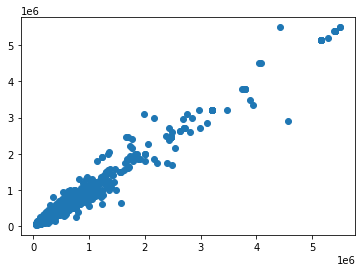

In [55]:
plt.scatter(predictedRandomForestOutput,Ydata_test)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   2.,   1.,
          0.,   4.,   2.,   0.,   3.,   7.,  11.,  10.,  13.,  25.,  22.,
         48.,  77., 113., 191., 354., 241., 154., 114.,  63.,  41.,  19.,
         12.,   7.,   8.,   4.,   2.,   2.,   5.,   2.,   2.,   0.,   3.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   3.,   1.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-1.66038000e+06, -1.63269410e+06, -1.60500820e+06, -1.57732230e+06,
        -1.54963640e+06, -1.52195050e+06, -1.49426460e+06, -1.46657870e+06,
        -1.43889280e+06, -1.41120690e+06, -1.38352100e+06, -1.35583510e+06,
        -1.32814920e+06, -1.30046330e+06, -1.27277740e+06, -1.24509150e+06,
        -1.217

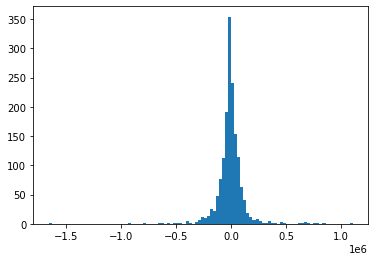

In [56]:
plt.hist(Ydata_test - predictedRandomForestOutput, bins=100)

In [57]:
rmse=mse**0.5
rmse.mean(), rmse.std()

(130367.50228963907, 0.0)

# AdaBoost Regression

In [66]:
adaBoostReg=AdaBoostRegressor(base_estimator=randomForestReg, n_estimators=30, random_state=0)
adaBoostReg.fit(Xdata_train, Ydata_train)

predictedAdaBoostOutput= adaBoostReg.predict(Xdata_test)
predictedTrainOutput=adaBoostReg.predict(Xdata_train)

mset=mean_squared_error(Ydata_train,predictedTrainOutput)
r2t=r2_score(Ydata_train,predictedTrainOutput)

print('Test Data performance:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_test,predictedAdaBoostOutput))
print('R Square score: %.2f' %r2_score(Ydata_test,predictedAdaBoostOutput))
print('Training Metrics:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_train,predictedTrainOutput))
print('R Square score: %.2f' %r2_score(Ydata_train,predictedTrainOutput))

Test Data performance:
Mean squared error: 14042638610.42
R Square score: 0.98
Training Metrics:
Mean squared error: 794852821.29
R Square score: 1.00


In [59]:
adaBoostReg=AdaBoostRegressor( n_estimators=30, random_state=0)
adaBoostReg.fit(Xdata_train, Ydata_train)

predictedAdaBoostOutput= adaBoostReg.predict(Xdata_test)
predictedTrainOutput=adaBoostReg.predict(Xdata_train)

mset=mean_squared_error(Ydata_train,predictedTrainOutput)
r2t=r2_score(Ydata_train,predictedTrainOutput)

print('Test Data performance:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_test,predictedAdaBoostOutput))
print('R Square score: %.2f' %r2_score(Ydata_test,predictedAdaBoostOutput))
print('Training Metrics:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_train,predictedTrainOutput))
print('R Square score: %.2f' %r2_score(Ydata_train,predictedTrainOutput))

Test Data performance:
Mean squared error: 91561438686.27
R Square score: 0.84
Training Metrics:
Mean squared error: 89406312356.09
R Square score: 0.87


* The first Adaboost Regression model has the base estimator as the Random Forest model previously trained. This model gives R2 score of training data as 1 and testing data as 0.98.
* The second Adaboost Regression model has the base estimator as the default Decision Tree. This model gives R2 score of training data as 0.87 and testing data as 0.84.
* The first model performs really well on the dataset. However R2 score of train dataset as 1.00 is a concern as it can be a case of overfitting.

In [67]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Adaboost Regression','R2 Score':r2_score(Ydata_test,predictedAdaBoostOutput),'MSE':mean_squared_error(Ydata_test,predictedAdaBoostOutput),'Parameters':'base_estimator=randomForestReg, n_estimators=30'},ignore_index=True)

# Gradient Boosting Regression

In [60]:

xg_reg=GradientBoostingRegressor(n_estimators=30)
xg_reg.fit(Xdata_train, Ydata_train)
predicted=xg_reg.predict(Xdata_test)
predictedTrainOutput= xg_reg.predict(Xdata_train)

print('Test data performance:')
print('MSE: %.2f' %mean_squared_error(Ydata_test, predicted))
print('R square score: %.2f' %r2_score(Ydata_test, predicted))
print('Training Metrics:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_train,predictedTrainOutput))
print('R Square score: %.2f' %r2_score(Ydata_train,predictedTrainOutput))

Test data performance:
MSE: 40113987348.56
R square score: 0.93
Training Metrics:
Mean squared error: 37873914606.33
R Square score: 0.94


* The Gradient Boosting model has a good performance on dataset. It performs better than all types of Linear Regression model and KNN model.

In [61]:
performanceMetrics =performanceMetrics.append({'Algorithm':'Gradient Boosting','R2 Score':r2_score(Ydata_test, predicted),'MSE':mean_squared_error(Ydata_test, predicted),'Parameters':'n_estimators=30'},ignore_index=True)

# XG Boost

In [62]:

xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,
                       max_depth=5, alpha=10, n_estimators=50)
xg_reg.fit(Xdata_train, Ydata_train)
predicted=xg_reg.predict(Xdata_test)
predictedTrainOutput=xg_reg.predict(Xdata_train)

print('Test data performance:')
print('MSE: %.2f' %mean_squared_error(Ydata_test, predicted))
print('R square score: %.2f' %r2_score(Ydata_test, predicted))
print('Training Metrics:')
print('Mean squared error: %.2f' %mean_squared_error(Ydata_train,predictedTrainOutput))
print('R Square score: %.2f' %r2_score(Ydata_train,predictedTrainOutput))

[06:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Test data performance:
MSE: 37025233127.04
R square score: 0.94
Training Metrics:
Mean squared error: 27208036499.67
R Square score: 0.96


* The XGBoost model has a good performance on dataset. It performs better than all types of Linear Regression model and KNN model.

In [63]:
performanceMetrics =performanceMetrics.append({'Algorithm':'XGBoost','R2 Score':r2_score(Ydata_test, predicted),'MSE':mean_squared_error(Ydata_test, predicted),'Parameters':'objective=\'reg:linear\',colsample_bytree=0.3,learning_rate=0.1,max_depth=5, alpha=10, n_estimators=50'},ignore_index=True)

## Comparison between models

In [68]:
performanceMetrics['RMSE']=performanceMetrics['MSE']**0.5

In [69]:
performanceMetrics.sort_values(['R2 Score','RMSE'],ascending=[False,True])

,Algorithm,R2 Score,MSE,Parameters,RMSE
9,Adaboost Regression,0.975921,1.404264e+10,"base_estimator=randomForestReg, n_estimators=30",118501.639695
6,Random Forests,0.970857,1.699569e+10,"n_estimators=100,random_state=0,max_depth=None...",130367.502290
5,Decision Tree,0.966382,2.163906e+10,"{'criterion': 'mse', 'max_depth': 11, 'min_sam...",147102.222148
8,XGBoost,0.936513,3.702523e+10,"objective='reg:linear',colsample_bytree=0.3,le...",192419.419828
7,Gradient Boosting,0.931216,4.011399e+10,n_estimators=30,200284.765643
4,KNN,0.874511,8.930899e+10,"{'algorithm': 'brute', 'metric': 'manhattan', ...",298846.105123
0,Linear Regression(without PCA),0.695888,2.282399e+11,NaN,477744.619251
3,Linear Regression(with Lasso),0.695887,2.282401e+11,Alpha=0.05,477744.796616
2,Linear Regression(with Ridge),0.695811,2.282978e+11,Alpha=0.05,477805.202182
1,Linear Regression(with PCA),0.634171,2.745591e+11,NaN,523983.893208


* The Linear regression models (with and without PCA, and ridge and lasso regularization) performs average on the dataset.
* The KNN model overfits.
* Boosting algorithms have a good performance on the dataset. However Adaboost has the best performance of all, but R2 score of train dataset as 1 is a major concern.
* Decision Tree and Random Forest models have a good performance on the dataset.

### 4.	Identify the right metric to evaluate the performance of the model.

**MAE** is the average of the absolute difference between the predicted values and observed value.

**RMSE** represents the sample standard deviation of the differences between predicted values and observed values (called residuals).

The formula for **R-Squared** is as follows:

R2=1−MSE(model)MSE(baseline)=1−∑Ni=1(y1−y1^)2∑Ni=1(y1¯−y1^)2
 
MSE(model): Mean Squared Error of the predictions against the actual values

MSE(baseline): Mean Squared Error of mean prediction against the actual values

In other words how good our regression model as compared to a very simple model that just predicts the mean value of target from the train set as predictions.

A model performing equal to baseline would give R-Squared as 0. Better the model, higher the r2 value.
Range[- infinity, 1)

* It is easy to understand and interpret MAE because it directly takes the average of offsets whereas RMSE penalizes the higher difference more than MAE. Generally, RMSE will be higher than or equal to MAE. The only case where it equals MAE is when all the differences are equal or zero

* However, even after being more complex and biased towards higher deviation, RMSE is still the default metric of many models because loss function defined in terms of RMSE is smoothly differentiable and makes it easier to perform mathematical operations.

* R-Squared is also termed as the standardized version of MSE. R-squared represents the fraction of variance of response variable captured by the regression model rather than the MSE which captures the residual error.

* Thus, we take into consideration both R2 and MSE.

### Q5.	Identify issues and concerns on the given data and suggest the best technique/s to overcome the issues.

1. The original dataset had a few records with mileage =0. Temporarily, these records have been imputed with their respective brand averages.If the test/new data is expected to have such values, they will have to be similarly imputed for the time being.

2. There is class imbalance when it comes to brand, owner or fuel attributes. It might happen that due to this, there are inaccurate results.